# 1. Load Python Libraries

Load the python libraries you will need for this project and read your dataset.

In [59]:
# This section imports the following modules to be used for the dataset.
import pandas as pd
import numpy as np
import os
from sklearn import datasets, linear_model
from sklearn import metrics
from matplotlib import pyplot as plt
os.chdir("/Users/andreschovil/Desktop/Promotable/Python/Modeling/")  
os.getcwd()

'/Users/andreschovil/Desktop/Promotable/Python/Modeling'

In [60]:
# Using pandas to read the NFL_fandom.csv file and assinging values.
nfl = pd.read_csv("NFL_fandom.csv", header = 0)

In [61]:
# Checking the first 10 rows of dataset.
nfl.head(6)

,RowNumber,Team,Conference,TotalRespondents,AsianDemocrat,BlackDemocrat,HispanicDemocrat,OtherDemocrat,WhiteDemocrat,TotalDemocrat,...,BlackRepublican,HispanicRepublican,OtherRepublican,WhiteRepublican,TotalRepublican,GOP%,Dem%,Ind%,White%,Nonwhite%
0,1,Arizona Cardinals,NFC,148,2.0,7,7.0,3.0,20,39,...,1.0,5.0,2.0,30,38,0.0026,0.0026,0.0048,0.0068,0.0032
1,2,Atlanta Falcons,NFC,188,3.0,27,5.0,1.0,23,59,...,7.0,2.0,3.0,41,54,0.0029,0.0031,0.0040,0.0057,0.0043
2,3,Baltimore Ravens,AFC,150,5.0,14,3.0,4.0,30,56,...,1.0,1.0,1.0,26,29,0.0019,0.0037,0.0043,0.0068,0.0032
3,4,Buffalo Bills,AFC,92,2.0,3,1.0,1.0,15,22,...,3.0,4.0,NaN,16,24,0.0026,0.0024,0.0050,0.0067,0.0033
4,5,Carolina Panthers,NFC,164,4.0,16,3.0,2.0,26,51,...,NaN,1.0,1.0,44,49,0.0030,0.0031,0.0039,0.0070,0.0030
5,6,Chicago Bears,NFC,285,5.0,16,8.0,2.0,63,94,...,1.0,4.0,1.0,54,62,0.0022,0.0033,0.0045,0.0076,0.0024


In [63]:
# This is locating the percentage of Democrats who are Miami Dolphin's fans.
nfl.loc[nfl["Team"]== "Miami Dolphins", ["Dem%"]]

,Dem%
17,0.0033


# 2. Create Dummy Variables & Recode Missing Data

Be able to create dummy variables and recode missing, null or NA values.

In [20]:
# Checking for missing data

In [64]:
nfl.isnull().values.any()

True

In [89]:
# Checking sum of null values per row
nfl.isnull().sum()

RowNumber              0
Team                   0
Conference             1
TotalRespondents       0
AsianDemocrat          2
BlackDemocrat          0
HispanicDemocrat       1
OtherDemocrat          1
WhiteDemocrat          0
TotalDemocrat          0
AsianIndependent       3
BlackIndependent       0
HispanicIndependent    4
OtherIndependent       1
WhiteIndependent       0
TotalIndependent       0
AsianRepublican        9
BlackRepublican        8
HispanicRepublican     7
OtherRepublican        4
WhiteRepublican        0
TotalRepublican        0
GOP%                   0
Dem%                   0
Ind%                   0
White%                 0
Nonwhite%              0
dtype: int64

In [108]:
# Trying to replace null values with zero, but noticed that some zeros were added to other values as a decimal. Is this correct?
nfl.fillna(value=0, method=None, axis=None, inplace=False, limit=None, downcast=None)

,RowNumber,Team,Conference,TotalRespondents,AsianDemocrat,BlackDemocrat,HispanicDemocrat,OtherDemocrat,WhiteDemocrat,TotalDemocrat,...,BlackRepublican,HispanicRepublican,OtherRepublican,WhiteRepublican,TotalRepublican,GOP%,Dem%,Ind%,White%,Nonwhite%
0,1,Arizona Cardinals,NFC,148,2.0,7,7.0,3.0,20,39,...,1.0,5.0,2.0,30,38,0.0026,0.0026,0.0048,0.0068,0.0032
1,2,Atlanta Falcons,NFC,188,3.0,27,5.0,1.0,23,59,...,7.0,2.0,3.0,41,54,0.0029,0.0031,0.0040,0.0057,0.0043
2,3,Baltimore Ravens,AFC,150,5.0,14,3.0,4.0,30,56,...,1.0,1.0,1.0,26,29,0.0019,0.0037,0.0043,0.0068,0.0032
3,4,Buffalo Bills,AFC,92,2.0,3,1.0,1.0,15,22,...,3.0,4.0,0.0,16,24,0.0026,0.0024,0.0050,0.0067,0.0033
4,5,Carolina Panthers,NFC,164,4.0,16,3.0,2.0,26,51,...,0.0,1.0,1.0,44,49,0.0030,0.0031,0.0039,0.0070,0.0030
5,6,Chicago Bears,NFC,285,5.0,16,8.0,2.0,63,94,...,1.0,4.0,1.0,54,62,0.0022,0.0033,0.0045,0.0076,0.0024
6,7,Cincinnati Bengals,AFC,106,0.0,6,1.0,1.0,29,37,...,3.0,0.0,2.0,30,37,0.0035,0.0035,0.0030,0.0081,0.0019
7,8,Cleveland Browns,AFC,105,2.0,3,3.0,2.0,24,34,...,1.0,0.0,2.0,26,29,0.0028,0.0032,0.0040,0.0081,0.0019
8,9,Dallas Cowboys,NFC,438,5.0,30,17.0,10.0,66,128,...,1.0,7.0,6.0,123,140,0.0032,0.0029,0.0039,0.0065,0.0035
9,10,Denver Broncos,AFC,313,4.0,15,7.0,6.0,68,100,...,1.0,3.0,3.0,84,91,0.0029,0.0032,0.0039,0.0077,0.0023


# 3. Describe Your Data

Generate discriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.

In [65]:
# Generating descriptive statistics that summarize central tendency and dispersion of the data
nfl.describe()

,RowNumber,TotalRespondents,AsianDemocrat,BlackDemocrat,HispanicDemocrat,OtherDemocrat,WhiteDemocrat,TotalDemocrat,AsianIndependent,BlackIndependent,...,BlackRepublican,HispanicRepublican,OtherRepublican,WhiteRepublican,TotalRepublican,GOP%,Dem%,Ind%,White%,Nonwhite%
count,33.00000,33.000000,31.000000,33.000000,32.000000,32.000000,33.000000,33.000000,30.000000,33.000000,...,25.000000,26.000000,29.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,17.00000,385.696970,7.419355,22.000000,11.437500,7.062500,78.303030,125.212121,7.666667,10.424242,...,3.520000,7.000000,4.206897,83.636364,98.000000,0.002585,0.003212,0.004197,0.007209,0.002791
std,9.66954,1078.836511,20.135829,61.637549,31.602304,19.478586,219.227833,350.284862,20.394951,29.244690,...,8.554336,17.306646,11.007722,234.120938,274.242365,0.000424,0.000420,0.000342,0.000640,0.000640
min,1.00000,41.000000,1.000000,1.000000,1.000000,1.000000,7.000000,11.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,12.000000,12.000000,0.001800,0.002400,0.003000,0.005700,0.001800
25%,9.00000,130.000000,2.000000,6.000000,2.000000,2.000000,24.000000,37.000000,2.250000,4.000000,...,1.000000,2.000000,1.000000,28.000000,35.000000,0.002300,0.002900,0.004000,0.006700,0.002200
50%,17.00000,156.000000,3.000000,11.000000,6.000000,3.000000,33.000000,53.000000,4.000000,4.000000,...,1.000000,3.000000,2.000000,34.000000,39.000000,0.002500,0.003200,0.004200,0.007200,0.002800
75%,25.00000,279.000000,5.000000,16.000000,8.000000,5.250000,61.000000,95.000000,5.000000,8.000000,...,2.000000,5.000000,3.000000,54.000000,60.000000,0.002900,0.003500,0.004400,0.007800,0.003300
max,33.00000,6364.000000,115.000000,363.000000,183.000000,113.000000,1292.000000,2066.000000,115.000000,172.000000,...,44.000000,91.000000,61.000000,1380.000000,1617.000000,0.003500,0.004000,0.005000,0.008200,0.004300


In [78]:
# Generating shape (number of rows, columns)
nfl.shape

(33, 27)

# 4. Which of the variables are potentially collinear?

Show the two key outputs of correlation (magnitude and sign) for the variables in the dataset.

In [76]:
# I don't understand why almost all of the correlation is near negative correlation. Does it have something to do with the data format. As you can see, I converted the percentages to decimal points.
nfl.loc[:, ["TotalRespondents", "Dem%", "GOP%", "Ind%", "Nonwhite%", "White%"]].corr()

,TotalRespondents,Dem%,GOP%,Ind%,Nonwhite%,White%
TotalRespondents,1.000000,0.011536,-0.054119,0.008290,0.010405,-0.010405
Dem%,0.011536,1.000000,-0.677492,-0.428300,0.137829,-0.137829
GOP%,-0.054119,-0.677492,1.000000,-0.362372,-0.196624,0.196624
Ind%,0.008290,-0.428300,-0.362372,1.000000,0.075528,-0.075528
Nonwhite%,0.010405,0.137829,-0.196624,0.075528,1.000000,-1.000000
White%,-0.010405,-0.137829,0.196624,-0.075528,-1.000000,1.000000


# 5. Create a exploratory analysis plan of your data

Write an analysis plan that explores the associate between your variables you picked for your hypothesis.

I'll be using EDA to test the following underlying assumption.
1. HispanicDemocrats has a positive correlation with TotalDemocrats. 
2. Teams with a high % of nonwhite fans tend to be more Democratic. 
I'll use correlation formulas functions to calculate correlations, as well as use scatterplots to visualize it. 

In [113]:
nfl.loc[:, ["HispanicDemocrat", "TotalDemocrat"]].corr()

,HispanicDemocrat,TotalDemocrat
HispanicDemocrat,1.000000,0.996639
TotalDemocrat,0.996639,1.000000


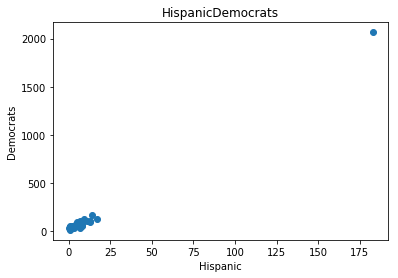

In [111]:
# scatter plot - its obvious that Hispanic Democrats has a positive correlation with Total Democrats. I'm just practicing the functions here.
plt.scatter(nfl['HispanicDemocrat'], nfl['TotalDemocrat'])
plt.xlabel('Hispanic')
plt.ylabel('Democrats')
plt.title('HispanicDemocrats')
plt.show()